# Statistical Inference

## Introduction

**Statistical Inference** uses classical statistics to observe, study, and predict patterns resulting from data analysis and probabilistic modeling. There are two main approaches to the field, either **Frequentist** or **Bayesian**. The first approach implies a fixed distribution responsible for the generation of repeated patterns in the data. We can find the best estimate of the distribution's parameters given data samples. The last one implies that the state of the world can be updated using observed samples. The parameters of the distributions can themselves be represented using probability.

As an example, here is a situation explaining using the two frameworks. Imagine your phone is ringing in your house, and you want to reach it:
- **Frequentist**: I have a mental model of my house. Given the beeping sound, I can infer the house's area to search for my phone.
- **Bayesian**: On top of having a mental model of my house, I also remember from the past where I misplaced the phone. By combining my inferences using the beeps and my prior information on its location, I can identify the house area and locate my phone.

## Statistical Analysis Fundamentals

**Statistical Analysis** allows us to describe patterns observed in any given dataset via **Visualization** or **Statistical Descriptors**. In statistics, we are interested in studying a given **Sample** from a **Population** of **Individuals**.

```{note}
Statistical Descriptors are closely related to [Probability Descriptors](./2_probabilities_and_information_theory.ipynb). As we will observe later in the chapter, the Observed Mean can be associated with the Expectation, the Observed Variance to the Variance, and many more.
```

Suppose we design a study on the effectiveness of some medicine for some given disease. In that case, the sample corresponds to the set of patients who participated in the study, and the population represents all the people suffering from the studied disease.

To give credit to a **Study**, in other word to **Generalize** its results, the sample needs to **Reflect** the **Variation** present in the entire population of interest. One way to obtain such a sample is to include **Randomness** in the population's selection process.

Now that we have defined the context of application let us define all the fundamentals of Statistical Analysis.

```{note}
The different types of visualizations that can be used to express some data series' underlying variations have been discussed in the [Data Visualization Chapter](../1_data_representations/1_data_visualization.ipynb).
```

### Central Tendency

The first type of descriptor is the **Central Tendency**. It expresses the central value, the typical value for a data distribution. The most common central tendency measures are the **Mode**, the **Mean**, and the **Median**.

The **Mode** $M_o$ is the value that occurs most often in a given set of data values.

The **Mean** $\overline{x}$ refers to the **Arithmetic Mean**:

$$
\overline{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

In some cases it also refers to the **Weighted Arithmetic Mean**:

$$
\overline{x} = \frac{1}{n} \sum_{i=1}^{n} w_i x_i
$$

The **Median** $M_e$ is the variable responsible for separating the statistical distributions as two equally populated groups when organized in ascending order.

$$
M_e = \begin{cases}
x_{(n+1)/2} & \text{if}\;n\;\text{is odd} \\
\frac{x_{n/2} + x_{n/2 + 1}}{2} & \text{if}\;n\;\text{is even}
\end{cases}
$$

Let us consider the following example, which compiles one exam score for each of $22$ students and compute its central tendency metrics:

In [82]:
import pandas as pd
import numpy as np
np.random.seed(42)
pd.options.display.max_columns = 22


N = 22

# Generate Data for Example
df = pd.DataFrame(data=np.random.normal(13, 3, size=N).astype(int), columns=["score"])
df.head(N).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
score,14,12,14,17,12,12,17,15,11,14,11,11,13,7,7,11,9,13,10,8,17,12


In [77]:
print(f"Mode  : {df.score.mode().array[0]:.2f}")
print(f"Mean  : {df.score.mean():.2f}")
print(f"Median: {df.score.median():.2f}")

Mode  : 11.00
Mean  : 12.14
Median: 12.00


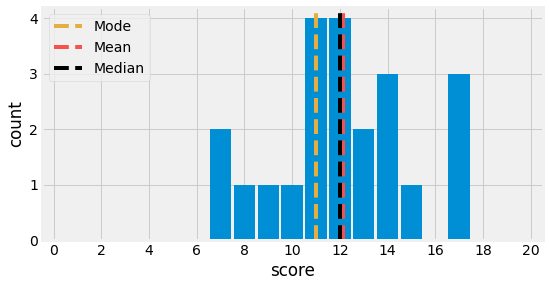

In [124]:
import matplotlib.pyplot as plt
import numpy as np
plt.ion()
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(8, 4), facecolor="white")
ax = fig.add_subplot(1, 1, 1)

ax.hist(df.score, bins=np.arange(20) - 0.5, rwidth=0.9)
line1 = ax.axvline(df.score.mode().array[0], color="#E5AE42", linestyle="--")
line2 = ax.axvline(df.score.mean(), color="#F6514C", linestyle="--")
line3 = ax.axvline(df.score.median(), color="k", linestyle="--")
ax.set_xlabel("score")
ax.set_ylabel("count")
ax.set_xticks(range(0, 20 + 1, 2))
ax.set_xlim(-0.5, 20.5)
ax.legend(handles=[line1, line2, line3], labels=["Mode", "Mean", "Median"])

fig.canvas.draw()

In [ ]:
from myst_nb import glue
glue("stat_centen_fig", fig, display=False)

```{glue:figure} stat_centen_fig
:align: center
:name: "stat-centen-fig"

Mode, Mean, and Median Visualization for a dataset containing exam's scores of $22$ students.
```

### Spread

The second type of descriptor is the **Spread** or **Dispersion** of a data series. It is often implied to be the spread around its mean. The most common spread measures are the **Range** and the **Variance**, thus the **Standard Deviation**.

The **Range** $R$ of a data series is defined as the difference between its maximum and minimum values. If the values are organized in ascending order, its:

$$
R = x_n - x_0
$$

The **Variance**, $s^2$ for some observed data series, $\sigma^2$ for some theoretical distribution, is the average sum of square difference from the mean. It explains how the data is distributed around the mean. The **Standard Deviation** is defined as the square root of the variance. It allows working with the same unit as the data.

$$
s^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \overline{x_i})^2
$$

Let us consider the same example as for the central tendency and compute the range and the standard deviation of the student scores:

In [130]:
print(f"Range: {df.score.max() - df.score.min():.2f}")
print(f"Std  : {df.score.std():.2f}")

Range: 10.00
Std  : 2.93


### Correlation

The last type of descriptor is the **Correlation** between two variables $X$ and $Y$. In satistical analysis, it is often easier to interpret the correlation between two variables of the same unit. If it is not the case, it is common practice to centre and reduce the variables $x = \frac{X - \mu}{\sigma}$.

One of the correlation metrics is the **Linear Correlation Coeficient** between $X$ and $Y$ and is defined as:

$$
\rho(X, Y) = \frac{Cov(X, Y)}{\sigma_X \sigma_Y},\;\;-1 \leq \rho(X, Y) \leq 1
$$

When $\rho(X, Y)$ is closed to $-1$ or $1$, it means that $X$ and $Y$ are linearly related, and the sign defines the direction of the linearity. If $\rho(X, Y)$ is null, there is no linear dependency, no correlation between the two variables.

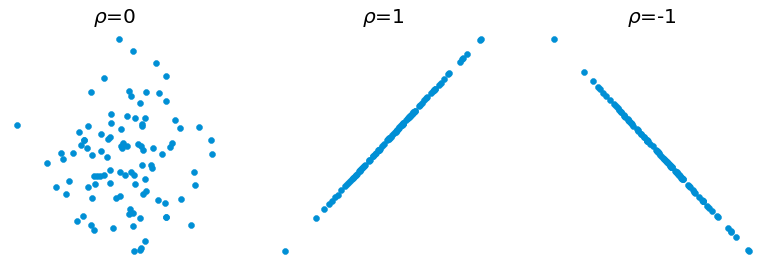

In [153]:
import matplotlib.pyplot as plt
import numpy as np
plt.ion()
plt.style.use('fivethirtyeight')
np.random.seed(42)

N = 100

fig = plt.figure(figsize=(12, 4), facecolor="white")
ax1, ax2, ax3 = [fig.add_subplot(1, 3, i + 1) for i in range(3)]

XY = np.random.normal(0, 1, (N, 2))
ax1.scatter(XY[:, 0], XY[:, 1])
ax1.set_axis_off()
ax1.title.set_text(r"$\rho$=0")

ax2.scatter(XY[:, 0], XY[:, 0])
ax2.set_axis_off()
ax2.title.set_text(r"$\rho$=1")

ax3.scatter(XY[:, 0], -XY[:, 0])
ax3.set_axis_off()
ax3.title.set_text(r"$\rho$=-1")

fig.subplots_adjust(hspace=0.40, wspace=0.25)
fig.canvas.draw()

In [ ]:
from myst_nb import glue
glue("stat_correl_fig", fig, display=False)

```{glue:figure} stat_correl_fig
:align: center
:name: "stat-correl-fig"

Visualization of the linear correlation coeficient between $X$ and $Y$.
```

## Sampling and Central Limit Theorem

### Sample

As stated previously in the chapter, statistic analysis allows us to study some probabilistic phenomena, for example, the error in diameter of a milling machine, on a defined **Sample** as the statistical characteristics of an entire population cannot be measured. In statistics, a **Sample** has to represent a **maximum** of the **variance** present in the **population** it is drawn from using a **known distribution**.

A **Sample** can be defined as a set of $n$ independant random variable $(X_1,\cdots,X_n)$ drawn from a same distribution. The Observations of a the sample are defined by $(x_1,\cdots,x_n)$.

A **Statistic** $T$ is a quantity, a measurable function, from the sample's values.

$$
T(X) = T(X_1,\cdots,X_n)
$$

The **Empirical Mean Satistic** $\overline{X}_n$ is:

$$
\overline{X}_n = \frac{1}{n} \sum_{i=1}^{n} X_i
$$

If we define $\mu$ the expected value, and $\sigma^2$ the variance of the random variable $X$, the **Expected Value** and the **Variance** for the statistic $\overline{X}_n$ can be defined as:

$$
\begin{align}
\mathbb{E}(\overline{X}_n) = \mu && Var(\overline{X}_n) = \frac{\sigma^2}{n}
\end{align}
$$

### Central Limit Theorem

In this section, two fundamental theorems of statistics are discussed, the **Law of Large Numbers** and the **Central Limit Theorem**. Both of them concern the $\overline{X}_n$ statistic for samples of independent and identically distributed random variables.

The **Law of Large Numbers** states that for such a framework, as the sample **size grows**, its **mean** gets **closer** to the **average** of the entire **population**. We have been relying secretly on this theorem when dealing with Monte Carlo Simulation.

$$
\overline{X}_n \rightarrow \mu \;\; \text{when} \;\; n \rightarrow +\infty
$$

Let us verify this fact empirically with an example. Consider a dice where $X$ represents the outcome number of a throw and follows a uniform distribution. 

$$
\begin{align}
P(X=x_i) = \frac{1}{6} && \mathbb{E}(X) = 3.5
\end{align}
$$

Let us repeat the experiment $n$ times and compute the statistic $\overline{X}_n$. When the sample size grows, its value should be closer to $\mu$, which is $3.5$. It is visually possible to verify that this convergence happens.

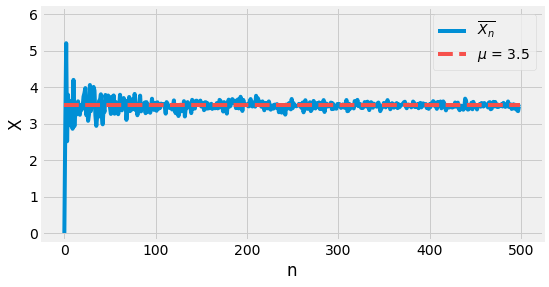

In [162]:
import matplotlib.pyplot as plt
import numpy as np
plt.ion()
plt.style.use('fivethirtyeight')
np.random.seed(42)

fig = plt.figure(figsize=(8, 4), facecolor="white")
ax = fig.add_subplot(1, 1, 1)

line1, *_ = ax.plot([np.random.uniform(1, 6, n).mean() if n > 0 else 0 for n in range(500)])
line2, *_ = ax.plot(np.ones(500) * 3.5, color="#F6514C", linestyle="--")
ax.legend(handles=[line1, line2], labels=["$\overline{X_n}$", "$\mu$ = 3.5"])
ax.set_xlabel("n")
ax.set_ylabel("X")
ax.set_ylim(-0.2, 6.2)

fig.canvas.draw()

In [ ]:
from myst_nb import glue
glue("stat_lln_fig", fig, display=False)

```{glue:figure} stat_lln_fig
:align: center
:name: "stat-lln-fig"

Visualization of the Low of Large Numbers. When $n$ grow, $\overline{X}_n$ gets closer to $\mu$.
```

The **Central Limit Theorem** States that for such a framework as the one described for this section, with expectation $\mu$ and variance $\sigma^2$:

$$
Z = \frac{\overline{X}_n - \mu}{\sigma / \sqrt{n}} \sim \mathcal{N}(0, 1) \;\; \text{when} \;\; n \rightarrow +\infty
$$

To resume, for any sample of a reasonably big size of independent random variable $X_i$, the standardized mean distribution $Z$ can be simplified to a normal distribution $\mathcal{N}(0, 1)$.

Let us verify this fact empirically with an example. Consider the uniform distribution $U(0, 1)$ and the poisson distribution $Pois(1)$. By taking samples of bigger and bigger sizes, the distribution of $\overline{X}_n$ should resemble the one of a normal distribution.

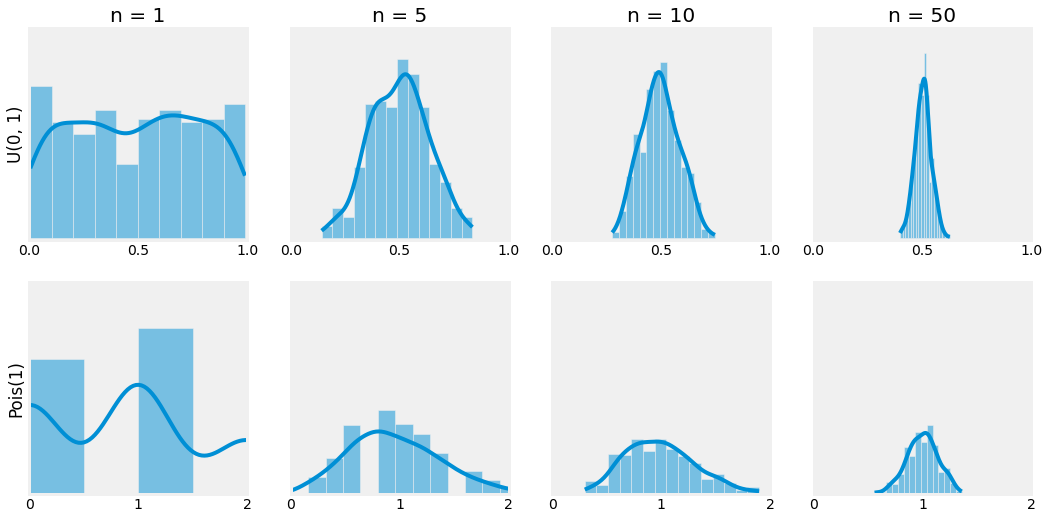

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.ion()
plt.style.use('fivethirtyeight')
np.random.seed(42)

sizes = [1, 5, 10, 50]
samples = 400

fig = plt.figure(figsize=(len(sizes) * 4, 8), facecolor="white")

for i, n in enumerate(sizes):
    ax = fig.add_subplot(2, len(sizes), i + 1)
    X_n = np.random.uniform(0, 1, (samples, n)).mean(-1)
    sns.histplot(X_n, kde=True, ax=ax)
    ax.set_ylim(-0.5, 70.5)
    ax.set_xlim(0, 1)
    ax.set_xticks((0, 0.5, 1))
    ax.set_yticks(())
    ax.grid()
    if i > 0: ax.set_ylabel("")
    else: ax.set_ylabel("U(0, 1)")
    ax.title.set_text(f"n = {n}")
    
for i, n in enumerate(sizes):
    ax = fig.add_subplot(2, len(sizes), len(sizes) + i + 1)
    X_n = np.random.poisson(1.0, (samples, n)).mean(-1)
    sns.histplot(X_n, kde=True, ax=ax)
    ax.set_ylim(-0.5, 200.5)
    ax.set_xlim(0, 2)
    ax.set_xticks((0, 1, 2))
    ax.set_yticks(())
    ax.grid()
    if i > 0: ax.set_ylabel("")
    else: ax.set_ylabel("Pois(1)")
        
fig.canvas.draw()

In [ ]:
from myst_nb import glue
glue("stat_clt_fig", fig, display=False)

```{glue:figure} stat_clt_fig
:align: center
:name: "stat-clt-fig"

Visualization of the Central Limit Theorem. When $n$ grow, the distribution of $\overline{X}_n$ gets closer to a normal distribution.
```

## Estimates

The goal of statistical inference is to find, to infer, some **Estimate** of some **Parameters** $\theta$ governing some hypothetical distribution supposed to be responsible for the variation in the set of random variables studied $X$. The distribution is chosen appropriately using the tools of statistical analysis.

The idea of an **Estimator** is to approximate a statistical parameter. Statistical descriptors are such estimators as they approximate a statistical parameter concerning the studied population given a sample. An **Estimate** is the value obtained after the measurement of an estimator.

As it may imply in its name, **approximate** means that an estimate is not and **never** will be **perfect**. There is some notion of error, commonly referred to as the **Margin of Error**.

In this section, we study two different kinds of estimators, **Point Estimators** and **Interval Estimators**, and discuss approaches to find them.

### Point Estimate

**Point Estimators** can be created using different approaches. Among them two will be presented, the **Method of Moments**, and the **Maximum Likelihood**.

```{note}
|Unkown Population Parameter  |Symbol    |Empirical Point Estimation|Symbol          |
|:----------------------------|:--------:|:-------------------------|:--------------:|
|Population mean              |$\mu$     |Sample mean               |$\hat{\mu}$     |
|Population standard deviation|$\sigma^2$|Sample variance           |$\hat{\sigma}^2$|
|Population standard deviation|$\sigma$  |Sample standard deviation |$\hat{\sigma}$  |
|Population proportion        |$p$       |Sample proportion         |$\hat{p}$       |
```

#### Method of Moments

Before even looking at the **Method of Moments**, or **MM** for short, we need to define a **Moment**. The $k$-th Moment of a given random variable $X$ is expressed as:

$$
\mathbb{E}[X^k]
$$

We already know from now on that an approximation of the first moment of $X$ is given by the sample mean:

$$
\frac{1}{n} \sum_{i=1}^{n} X_i
$$

Base on that we can approximate hte $k$-th Moment of $X$ by:

$$
\frac{1}{n} \sum_{i=1}^{n} X_i^k
$$

Let us consider the following example. Considere the random sample $X_1, \dots, X_n$ and try to approximate the population mean $\mu = \mathbb{E}[X]$ and the variance of the popylation $\sigma^2 = \mathbb{E}[(X - \mathbb{E}[X])^2] = \mathbb{E}[X^2] - \mu^2$ using the method of moments:

$$
\begin{align}
\hat{\mu} = \frac{1}{n} \sum_{1}^{n} X_i && \hat{\sigma}^2 = \frac{1}{n} \sum_{1}^{n} X_i^2 - \left [\ \frac{1}{n} \sum_{1}^{n} X_i \right ] ^2
\end{align}
$$

As you can notice, the method revolves around the sample mean and does not require any *PDF* nor *PMF* computation. One downfall of this method can be observed by looking at the second term of the variance estimator. If this term is too big, the approximation result will be negative, which is not acceptable.

#### Maximum Likelihood

Another method for creating point estimators is the **Maximum Likelihood**. Let us remind the context we are dealing with. Consider $X_1, \dots, X_n$ a random sample *(independent)* of size $n$ sampled from a *PDF* or *PMF* $f(X | \theta)$. Our goal is to estimate, approximate $\theta$.

This method, as its name implies, consists on **maximizing** a function $\mathcal{L}(\theta | X_1, \dots, X_n)$ representing the **Likelihood** of having $\theta$ given our sample. The **Likelihood Function** is defined as the joint *PMF* of each individual of our sample:

$$
\begin{align}
\mathcal{L}(\theta | X_1, \dots, X_n) & = p(X_1, \dots, X_n | \theta) \\
                            & = p(X_1 | \theta) \cdots \dots \cdots p(X_n | \theta) \\
                            & = \prod_{i=1}^{n} p(X_i | \theta) \\
\end{align}
$$

The parameter $\hat{\theta}$ that maximizes the likelihood function is called the **Maximum Likelihood Estimator**, or **MLE** for short. As a reminder, finding the maximum of some function $f$ can be done by studying its derivative $f'$. In this sense we will often talk about the **Log Likelihood Function**:

$$
\begin{align}
l(\theta | X_1, \dots, X_n) & = log \mathcal{L}(\theta | X_1, \dots, X_n) \\
                            & = log \prod_{i=1}^{n} p(X_i | \theta) \\
                            & = \sum_{i=1}^{n} log p(X_i | \theta)
\end{align}
$$

**Log** is a **Monotonic** function, it does not change the order of what it is given, and the log of a product is the sum of logs. It allows us to simplify the likelihood as a sum and thus to simplify the process of derivation.

### Interval Estimates



## Hypothesis Testing
## Two Sample Hypothesis testing
## Chi-Square Test
## Anaysis of Variance
## Bayesian Inference
## Applications
### Logistic Regression
### Bayes Classification